In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# define the zero_pad function
def zero_pad(X, pad):
    """
    Pad with zeros all images of the dataset X.
    
    Argument:
    X -- numpy array of shape (m, n_H, n_W, n_C) 
            m: the number of images; n_H: the height of images; 
            n_W: the width of images; n_C: the number of channels
    pad -- integer, padding periphery number
    
    Returns:
    X_pad -- padded image of shape (m, n_H + 2*pad, n_W + 2*pad, n_C)
    """
    X_pad = np.pad(X,
                  ((0,0), (pad,pad), (pad,pad), (0,0)), 
                  mode ='constant',
                  constant_values = (0,0))
    return X_pad

# https://github.com/Timo9Madrid7/BEng_Project_Q-CNN/blob/master/3.3.1.Propagation_in_Convolutional_Layer.ipynb

In [3]:
def conv_forward(A_prev, W, b, hparameters):
    """
    Forward propagation for a convolution function
    
    Arguments:
    A_prev -- output activations of the previous layer, 
        numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    W -- Weights, numpy array of shape (f, f, n_C_prev, n_C)
    b -- Biases, numpy array of shape (1, 1, 1, n_C)
    hparameters -- python dictionary containing "stride" and "pad"
        
    Returns:
    Z -- conv output, numpy array of shape (m, n_H, n_W, n_C)
    cache -- cache of values needed for the conv_backward() function
    """
    
#   Retrieve dimensions from A_prev's shape  
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    
#   Retrieve dimensions from W's shape
    (f, f, n_C_prev, n_C) = W.shape
    
#   Retrieve information from "hparameters" 
    pad = hparameters.get('pad') 
    stride = hparameters.get('stride')
    
#   Compute the dimensions of the CONV output volume using the formula given above.
    n_H = int((n_H_prev-f+2*pad)/stride+1)
    n_W = int((n_W_prev-f+2*pad)/stride+1)
    
#   Initialize the output volume Z with zeros.
    Z = np.zeros([m, n_H, n_W, n_C])
    
#   Create A_prev_pad by padding A_prev
    A_prev_pad = zero_pad(A_prev, pad)

    for i in range(m):
        a_prev_pad = A_prev_pad[i, :, :, :]
        
        for h in range(n_H):
            vert_start = h * stride
            vert_end = vert_start + f
        
            for w in range(n_W):
                horiz_start = w * stride
                horiz_end = horiz_start + f
                
                for c in range(n_C):
                    a_prev_slice = a_prev_pad[vert_start:vert_end, horiz_start:horiz_end, :]
                    weights = W[:, :, :, c]
                    biases = b[:, :, :, c]
                    
                    Z[i, h, w, c] = (weights * a_prev_slice).sum() + biases
                    
    assert(Z.shape == (m, n_H, n_W, n_C))
    
    cache = (A_prev, W, b, hparameters)
    
    return Z, cache

In [4]:
# apply the model on our IFM. Remember to add the same seed as I did so as to get the same result!
np.random.seed(1)
A_prev = np.random.randn(10,5,7,4)
W = np.random.randn(3,3,4,8)
b = np.random.randn(1,1,1,8)
hparameters = {"pad" : 1,
               "stride": 2}

Z, cache_conv = conv_forward(A_prev, W, b, hparameters)

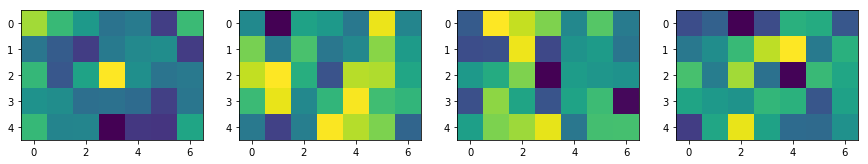

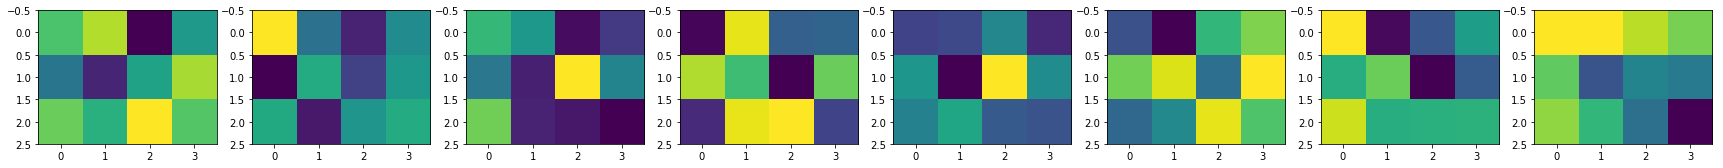

In [5]:
# let's see how it works with my first input image

plt.figure(num=0, figsize=(15,15))
for channel in range(A_prev.shape[3]):
#     print("A_prev's 1st input channel:",channel,'\n',A_prev[0,:,:,channel],'\n')
    plt.subplot(1,A_prev.shape[3],channel+1)
    plt.imshow(A_prev[0,:,:,channel])
   
plt.figure(num=1, figsize=(30,30))
for channel in range(Z.shape[3]):
#     print("Z 1st output channel:",channel,'\n',Z[0,:,:,channel],'\n')
    plt.subplot(1,Z.shape[3],channel+1)
    plt.imshow(Z[0,:,:,channel])

plt.show()
